<a href="https://colab.research.google.com/github/JHWannabe/Python-AI_5/blob/main/0216%20Day2/2_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0%EC%99%80_%EC%BC%80%EB%9D%BC%EC%8A%A42.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
mnist = keras.datasets.mnist # 손글씨 숫자 이미지 데이터 셋
# x_train : 손글씨 숫자 이미지 대입
# y_train : 이미지가 의미하는 숫자 대입
# x_test : 손글씨 숫자 이미지 대입
# y_test : 이미지가 의미하는 숫자 대입
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
# 손글씨 숫자 이미지 데이터는 0 ~ 255 사이의 값을 가짐
# 모델 훈련에 사용하기 전에 0 ~ 1 사이의 범위를 갖도록 변경
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
# Model 생성, 컴파일
model = tf.keras.models.Sequential([
    # 크기 28 * 28의 배열을 입력받아 1차워너 배열로 변환
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    # 히든 레이어의 노드 갯수는 128개, 활성화 함수로 relu 사용
    tf.keras.layers.Dense(128, activation='relu'),
    # 오버피팅 방지, 이전 레이어의 출력을 20% 섞음
    tf.keras.layers.Dropout(0.2),
    # 출력레이어의 노드개수를 10개로 설정, 활성화 함수는 softmax
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'] 
)

In [5]:
# Training
model.fit(x_train, y_train, epochs=10)
model.evaluate(x_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2929 - accuracy: 0.9146
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1405 - accuracy: 0.9589
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1056 - accuracy: 0.9674
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0861 - accuracy: 0.9736
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0760 - accuracy: 0.9756
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0656 - accuracy: 0.9787
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0590 - accuracy: 0.9819
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0528 - accuracy: 0.9826
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0467 - accuracy: 0.9847
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0753

[0.07530029863119125, 0.9787999987602234]

In [6]:
# x_train의 random한 가격 추출
import numpy as np
import matplotlib.pyplot as plt

idx = np.random.randint(len(x_train))
image = x_train[idx]

<function matplotlib.pyplot.show>

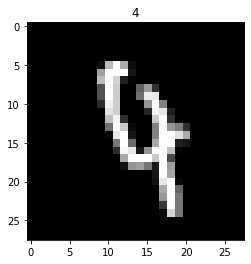

In [7]:
# image 확인
plt.imshow(image, cmap='gray')
plt.title(y_train[idx])
plt.show

In [8]:
import os
from PIL import Image
from google.colab import files

uploaded = files.upload()
for fn in uploaded.keys():
  print('업로드 파일 이름 : {name}, 용량 : {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving image.png to image.png
업로드 파일 이름 : image.png, 용량 : 449 bytes


/content/image.png


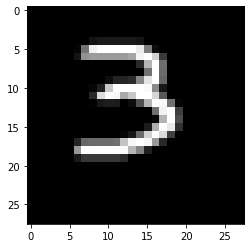

In [9]:
# image file의 경로 설정
cur_dir = os.getcwd()
img_path = os.path.join(cur_dir, 'image.png')
print(img_path)
cur_img = Image.open(img_path)

# 28 * 28 resize
cur_img = cur_img.resize((28, 28))
image = np.asarray(cur_img)

# color image 일 경우 RGB평균값으로 gray scale로 적용
try:
  image = np.mean(image, axis=2)
except:
  pass

# uploat한 image는 흰 배경에 검은 글씨로 되어 있으므로, MNIST data와 같이 검은 배경 흰 글씨로 변경
image = np.abs(255-image)

# MNIST와 동일하게 data preprocessing(255로 나눠줌)
image = image.astype(np.float32) /255

# 화면에 출력
plt.imshow(image, cmap='gray')
plt.show()

In [10]:
# shape를 변경하여 학습된 model에 넣고 결과를 확인
image = np.reshape(image, (1, 28, 28)) # 1장의 이미지, 픽셀 사이트
print(model.predict(image))

print('model이 예측한 값은 {} 입니다'.format(np.argmax(model.predict(image), -1)))

[[6.8016774e-03 1.1542416e-03 6.7373887e-02 1.4198767e-01 1.8252936e-01
  4.9194106e-04 2.5908221e-04 1.3532285e-01 1.2543836e-01 3.3864087e-01]]
model이 예측한 값은 [9] 입니다


In [11]:
# Dataset
# data를 처리하여 model에 공급하기 위하여 TensorFlow에 서는 tf.data.Dataset을 사용

# 트레이닝 셋 6만개, 테스트 셋 1만개, 이미지 28*28 그레이스케일, 10개의 클래스
mnist = keras.datasets.fashion_mnist
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 
               'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
              
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [12]:
# train_images, train_labels의 shape 확인
print(train_images.shape, train_labels.shape)

(60000, 28, 28) (60000,)


In [13]:
# test_images, test_labels의 shape 확인
print(test_images.shape, test_labels.shape)

(10000, 28, 28) (10000,)


In [14]:
type(train_images)

numpy.ndarray

In [15]:
# training set의 각 class별 image 수 확인
unique, counts = np.unique(train_labels, axis=-1, return_counts=True)
dict(zip(unique, counts))

{0: 6000,
 1: 6000,
 2: 6000,
 3: 6000,
 4: 6000,
 5: 6000,
 6: 6000,
 7: 6000,
 8: 6000,
 9: 6000}

In [16]:
# test set의 각 class별 image 수 확인
unique, counts = np.unique(test_labels, axis=-1, return_counts=True)
dict(zip(unique, counts))

{0: 1000,
 1: 1000,
 2: 1000,
 3: 1000,
 4: 1000,
 5: 1000,
 6: 1000,
 7: 1000,
 8: 1000,
 9: 1000}

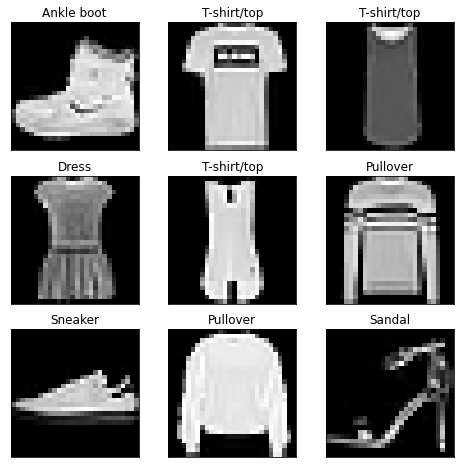

In [17]:
plt.figure(figsize=(8, 8))
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap='gray')
  plt.title(class_name[train_labels[i]])
plt.show()

In [18]:
# 데이터 전처리
# image를 0 ~ 1 사이 값으로 만들기 위해 255로 나눔
train_image = train_images.astype(np.float32) / 255.
test_image = test_images.astype(np.float32) / 255.

# one-hot encoding
train_labels = keras.utils.to_categorical(train_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)

In [ ]:
# dataset 만들기

train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(
 buffer_size = 100000).batch(64)
test_dataset = tf.data.Dataset.